## Semantic Trajectories

### This notebook walks through pathfinding methods for semantic trajectories. Semantic trajectories can be described as listing only highlights of a trajectory, such as start points, rest points, and end points. In short, this initial phase of this project confronts a problem statement of this form:

### Given a semantic trajectory T, a region R defined by a polygon P, and a time t, does a path exist that is able to take an agent through trajectory T in such a way that at time t, the agent is within the region R.

### This notebook provides an example formulation for how to operate the functions presented in traj_range_query.py

In [1]:
import sys
sys.path.append('./share')

In [22]:
import matplotlib.pyplot as plt
from traj_range_query import *
%matplotlib inline

In [25]:
# Load the files. 
# qf is the query file containing the polygon and time constraints.
# pf is the point-of-interest file which contains all the POIs and their coordinates
# tf is the trajectory file detailing the sequence of trajectories.
# Note that pathfinding here is not optimized and therefore running many trajectories takes a long time.
# For demonstration purposes, tf includes just 1 or 2 trajectories
qf = './files/query.txt'
pf = './files/POI.txt'
tf = './files/movestop_test.txt'

traj_dict, poi_dict, vertices, start_time, end_time, time_limit = parse_all(tf, qf, pf)

In [4]:
# Generate the graph from osm data as well 
G, pos = generate_graph(vertices)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [27]:
# Inject the points-of-interest. Either gives attributes to existing nodes or generates new nodes, depending on the nearest nodes
G_alt, poi_node_dict, pos = inject_multiple_pois(G, poi_dict, pos, vertices)

In [28]:
# Find which nodes are within the polygonal region defined by query file qf
P= nodes_in_poly(G_alt)

In [7]:
# Run query to find valid path. Times are temporarily placed here for more direct accessibility
start_time = 0.0
end_time = 0.06
time_limit = 0.5
valid_traj = run_query(G_alt, P, poi_node_dict, traj_dict, start_time, end_time, time_limit)

(2189211009, 4063814421)
(4063814421, 2330595490)
First steps
{(2189211009, 4063814421): {'to_target': 0.027948768153351285, 'to_poly': 0.029287276845908202, 'to_target_through_poly': 0.060785237652013074}, (4063814421, 2330595490): {'to_target': 0.045040625233094086, 'to_poly': 0.022148703724347782, 'to_target_through_poly': 0.06424309541873315}}
Shortest Pathing: 
[0.08873400580536436, 0.10928372065182723]
----
Passing steps
(0.029287276845908202, 0.060785237652013074)
(2189211009, 4063814421)
------------
0.0292872768459
0.060785237652
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
0.0591266031234
20613737
Found
Full trajectory:
[(2189211009, 1889135804), (1889135804, 4063814421), (4063814421, 2330595490)]
(1889135804, 4063814421)
(4063814421, 2330595490)


{0: [(41.878291, -87.666134), (41.883291, -87.650134), (41.89606, -87.630522)]}
[(41.89606, -87.630522), (41.883291, -87.650134), (41.878291, -87.666134)]
(41.89606, -87.630522)
(41.883291, -87.650134)
(41.878291, -87.666134)


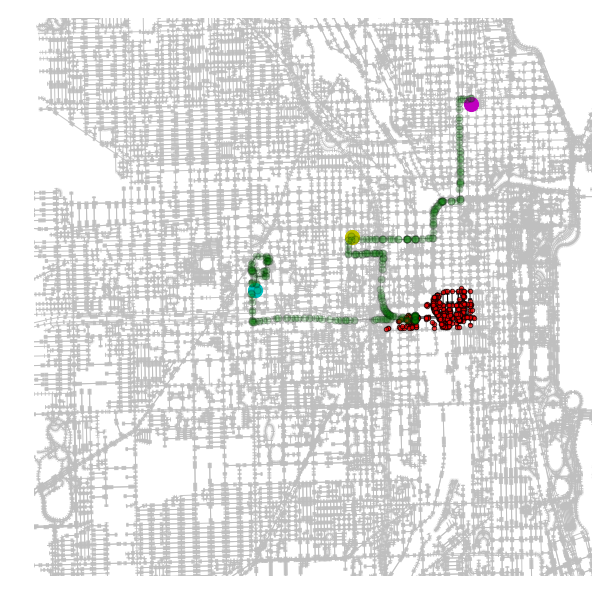

In [23]:
# Plot the graph. For purposes of this dataset, xr and yr are approximate bounds for attractive plotting
# Plot shows results of query.txt and trajectory3.txt, with times (start_time = 0.0, end_time = 0.074, time_limit = 0.5)
# Starting at the cyan 
xr = [-87.702697, -87.6107165]
yr =[41.8508055, 41.904383]
graph_plotter(G_alt, pos, valid_traj, traj_dict,xr, yr)

In [35]:
# Here we have an example of two trajectories failing. 
# The first cannot reach the polygon within the end_time constraint
# The second cannot perform full trajectory within the time_limit constraint
start_time = 0.0
end_time = 0.06
time_limit = 0.14
valid_traj = run_query(G_alt, P, poi_node_dict, traj_dict, start_time, end_time, time_limit)

(1657357242, 1647508401)
(2429684874, 2423710329)
First steps
{(2429684874, 2423710329): {'to_target': 0.0115033046939694, 'to_poly': 0.02862992357664929, 'to_target_through_poly': 0.05420330928869583}, (1657357242, 1647508401): {'to_target': 0.05124109650674515, 'to_poly': 0.016708570200313272, 'to_target_through_poly': 0.06405645142356897}, (2429684874, 2429684874): {'to_target': 0, 'to_poly': 0.02862992357664929, 'to_target_through_poly': 0.18041821047326276}}
Shortest Pathing: 
[0.1665386444370593, 0.18041821047326276, 0.07720991867663463]
----
Passing steps
(0.016708570200313272, 0.06405645142356897)
(1657357242, 1647508401)
------------
0.0167085702003
0.0640564514236
Shortest path from start to finish with this leg passing through the polygon is over the time limit
(0.02862992357664929, 0.18041821047326276)
(2429684874, 2429684874)
------------
0.0798710200834
Cannot reach polygon under upper time bound for this leg
(0.02862992357664929, 0.05420330928869583)
(2429684874, 2423710

{0: [(41.879508, -87.644675), (41.875508, -87.644675), (41.88417, -87.621899), (41.8826966, -87.6210755)], 1: [(41.8996224, -87.6299848), (41.8788055, -87.6552697), (41.8904383, -87.6137165)]}
[(41.88417, -87.621899), (41.8826966, -87.6210755), (41.879508, -87.644675), (41.875508, -87.644675)]
(41.88417, -87.621899)
(41.8826966, -87.6210755)
(41.879508, -87.644675)
(41.875508, -87.644675)
[(41.8788055, -87.6552697), (41.8996224, -87.6299848), (41.8904383, -87.6137165)]
(41.8788055, -87.6552697)
(41.8996224, -87.6299848)
(41.8904383, -87.6137165)


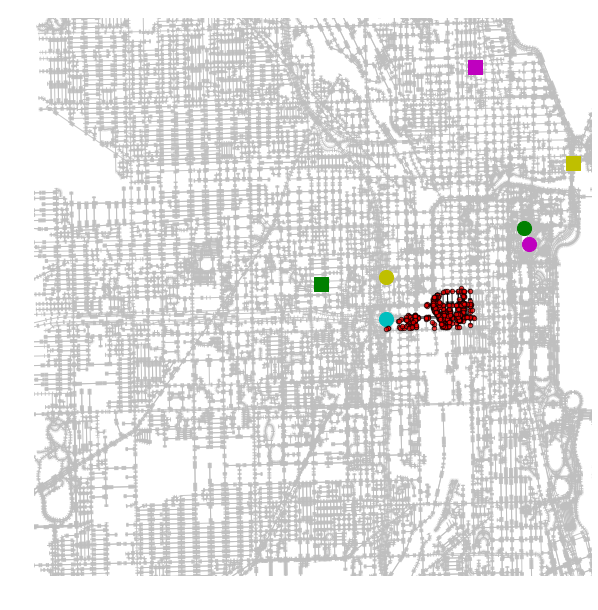

In [34]:
# Plot the graph. For purposes of this dataset, xr and yr are approximate bounds for attractive plotting
# Here's the layout of those failures. The first trajectory is circles green-yellow-magenta-cyan
# The second is squares green-yellow-magenta
xr = [-87.702697, -87.6107165]
yr =[41.8508055, 41.904383]
graph_plotter(G_alt, pos, valid_traj, traj_dict,xr, yr)

In [125]:
# Some valid settings for trajectory1.txt and query.txt
start_time = 0.0
end_time = 0.17
time_limit = 0.5

In [132]:
# Valid settings For trajectory2.txt and query.txt
start_time = 0.0
end_time = 0.074
time_limit = 0.5
valid_traj = run_query(G_alt, P, poi_node_dict, traj_dict, start_time, end_time, time_limit)

(2189211009, 4063814421)
(4063814421, 4156113198)
First steps
{(4063814421, 4156113198): {'to_target': 0.031379596550141386, 'to_poly': 0.022148703724347782, 'to_target_through_poly': 0.04179760181677711}, (2189211009, 4063814421): {'to_target': 0.027948768153351285, 'to_poly': 0.029287276845908202, 'to_target_through_poly': 0.060785237652013074}}
Shortest Pathing: 
[0.08873400580536436, 0.0731771983669185]
----
Passing steps
(0.029287276845908202, 0.060785237652013074)
(2189211009, 4063814421)
------------
0.0292872768459
0.060785237652
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
37000000
38000000
39000000
40000000
41000000
42000000
43000000
44000000
45000000
46000000
47000000
48000000
49000000
50000000
51000000
520000